## Loading the DataSet and finding some basic information

In [33]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import geopy
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Polygon, Point
import shapely.wkt
import h3

In [2]:
df=pd.read_csv("hackathon22_osm_bang_mumbai.csv")
df

,source,poi_code,name,poi_type,lat,long,address,city,state,country,pin_code,brand
0,OSM,POI_1003_6612393918,Parle,shop.food.bakery,13.049754,77.492895,NaN,Bangalore,Karnataka,India,NaN,NaN
1,OSM,POI_1003_6613030600,The Black Pearl,food.restaurant,12.939213,77.694701,NaN,Bangalore,Karnataka,India,NaN,NaN
2,OSM,POI_1003_4668296373,Temple,NaN,12.940448,77.693816,NaN,Bangalore,Karnataka,India,NaN,NaN
3,OSM,POI_1003_3771995983,Kadubeesanahalli Underpass,NaN,12.939450,77.695305,NaN,Bangalore,Karnataka,India,NaN,NaN
4,OSM,POI_1003_2413350412,NaN,health.wellbeing.swimming_pool,12.940660,77.693607,NaN,Bangalore,Karnataka,India,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
42925,OSM,POI_1003_3740962178,NaN,NaN,12.976237,77.611640,NaN,Bangalore,Karnataka,India,NaN,NaN
42926,OSM,POI_1003_3740962179,NaN,NaN,12.976275,77.611514,NaN,Bangalore,Karnataka,India,NaN,NaN
42927,OSM,POI_1003_3740962181,NaN,NaN,12.976317,77.611396,NaN,Bangalore,Karnataka,India,NaN,NaN
42928,OSM,POI_1003_3742106925,Soudhamani Estate NSB,NaN,12.821388,77.511637,NaN,Bangalore,Karnataka,India,560082,NaN


In [3]:
df.columns

Index(['source', 'poi_code', 'name', 'poi_type', 'lat', 'long', 'address',
       'city', 'state', 'country', 'pin_code', 'brand'],
      dtype='object')

### This columns represents the following schema
1. source: source from where the data was collected
2. poi_code: unique identifier of the POI
3. name: name of the POI
4. poi_type: type of POI (e.g car dealership, shopping mall, etc)
5. lat: latitude of the POI
6. long: longitude of the POI
7. address: address of POI
8. city: city of POI
9. state: state of POI
10. country: country of POI
11. pin_code: pincode of POI
12. brand: brand information of POI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42930 entries, 0 to 42929
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   source    42930 non-null  object 
 1   poi_code  42930 non-null  object 
 2   name      29986 non-null  object 
 3   poi_type  22401 non-null  object 
 4   lat       42930 non-null  float64
 5   long      42930 non-null  float64
 6   address   2663 non-null   object 
 7   city      42930 non-null  object 
 8   state     42930 non-null  object 
 9   country   42930 non-null  object 
 10  pin_code  7953 non-null   object 
 11  brand     1081 non-null   object 
dtypes: float64(2), object(10)
memory usage: 3.9+ MB


## Exploratory Data Analysis

## Finding the distribution of data from dataset in various cities

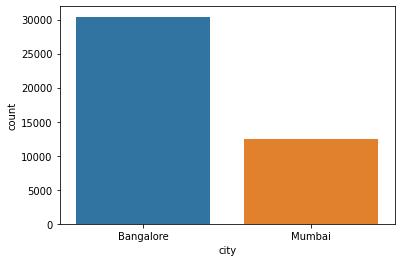

In [5]:
sns.countplot(x ='city', data = df)

### There are only 2 cities data in the dataset and majority data belongs to Bangalore city

## Finding the distribution of data from dataset in various state

Index(['source', 'poi_code', 'name', 'poi_type', 'lat', 'long', 'address',
       'city', 'state', 'country', 'pin_code', 'brand'],
      dtype='object')

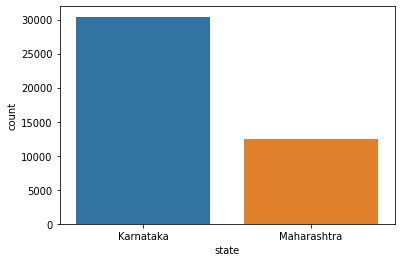

In [6]:
sns.countplot(x ='state', data = df)
df.columns

### As there are only 2 city and as they are both from different states we get 2 different states, Karantaka dominating the count of records in dataset 

## Displaying the count of top 10 brands given in the data

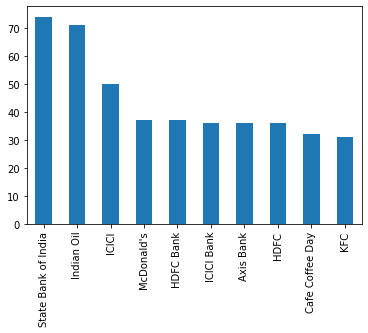

In [7]:
df['brand'].value_counts()[:10].plot(kind='bar')

### This graph represent the top 10 brands according to the data: State bank of india, Indian Oil, ICICI, McDonalds, HDFC Bank, ICICI Bank, Axis Bank, HDFC, Cafe Coffe Day and KFC

## Displaying the count of top 10 poi_type given in the data

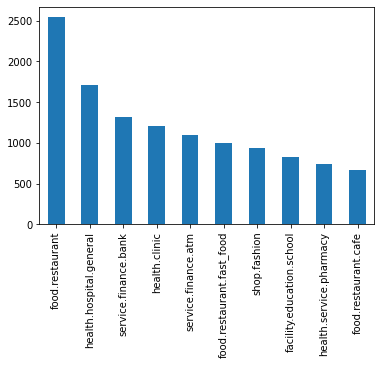

In [8]:
df['poi_type'].value_counts()[:10].plot(kind='bar')

### This graph represent the top 10 poi_types from the dataset: Restaurent, Heath-hospital,service-finance-bank,health-clinic,service-finance-atm,fast-food,shop-fashion,education-school,service-pharmacy,food-cafe

## Displaying the count of top 10 pin_code given in the data

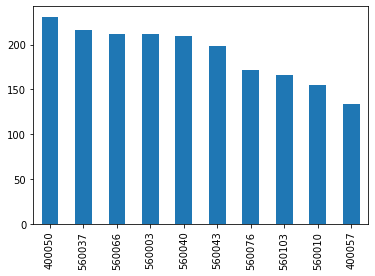

In [9]:
df['pin_code'].value_counts()[:10].plot(kind='bar')

### Top 10 pincodes that appear in this dataset are 40050,560037,560066,560003,560043,560076,560103,560010,400057

## Distribution of latitude in given dataset

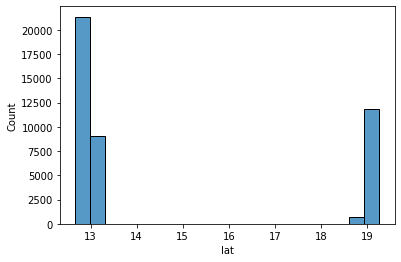

In [10]:
sns.histplot(data=df, x="lat")

### This dataset has latitude on value 13 and 19 and on no other latitutes

## Distribution of longitute in given dataset

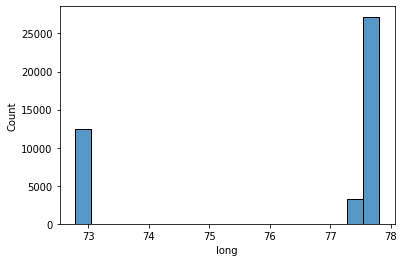

In [11]:
sns.histplot(data=df, x="long")

### This dataset has longitute: 73 and between 77 and 78 and no other

## Distribution of top 5 poi_types latitutewise

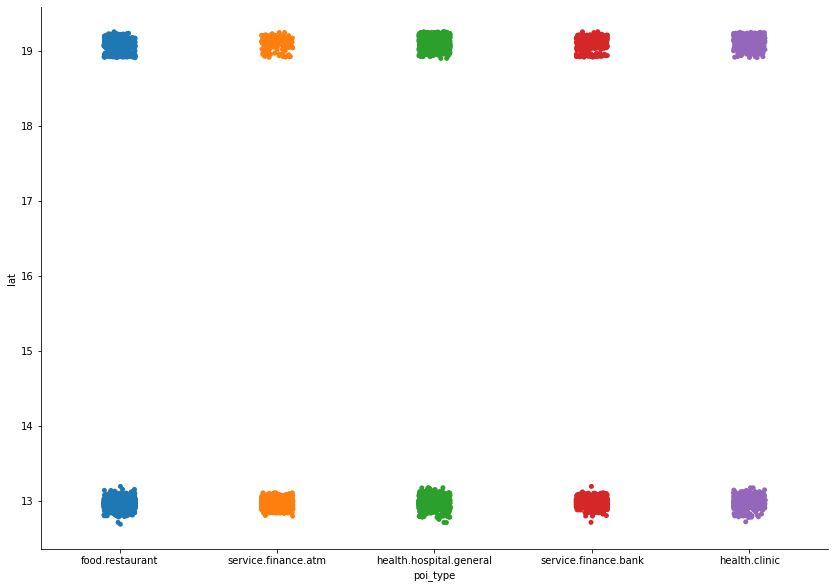

In [12]:
df1=df['poi_type'].value_counts()[:5]
df2=df[df['poi_type'].isin(df1.index.tolist())]
sns.catplot(data=df2, x="poi_type", y="lat",height=8.27, aspect=11.7/8.27)

### This graph represent that top 5 poi_type food.restuarent,service.finance.atm,health.hospital,service.finance,health.clinic are available only 2 latitue points 13 and 19

## Distribution of top 5 brand latitutewise

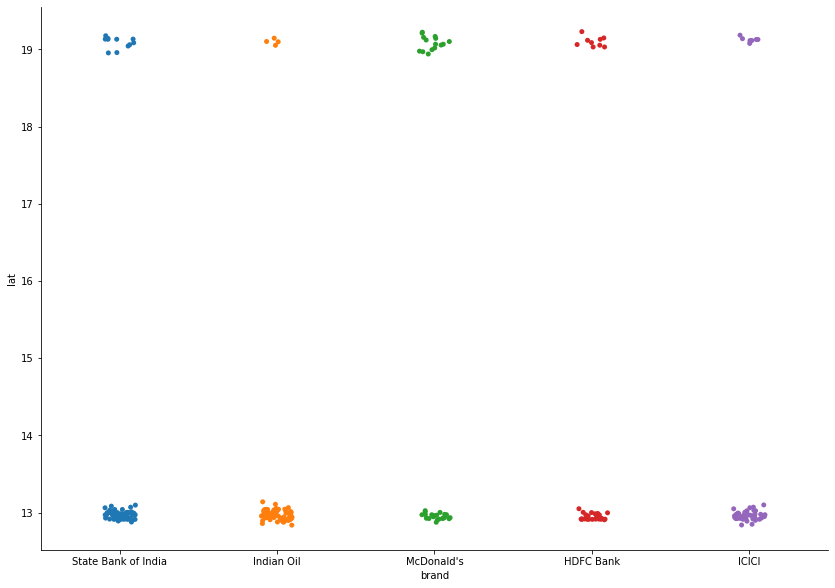

In [13]:
df1=df['brand'].value_counts()[:5]
df2=df[df['brand'].isin(df1.index.tolist())]
sns.catplot(data=df2, x="brand", y="lat",height=8.27, aspect=11.7/8.27)

### This graph represents the top 5 brands: State bank of india,indian oil, McDonalds,HDFC bank, ICICI are present on only 2 latitudes 13 and 19

## Top 5 poi_type based on longitutewise

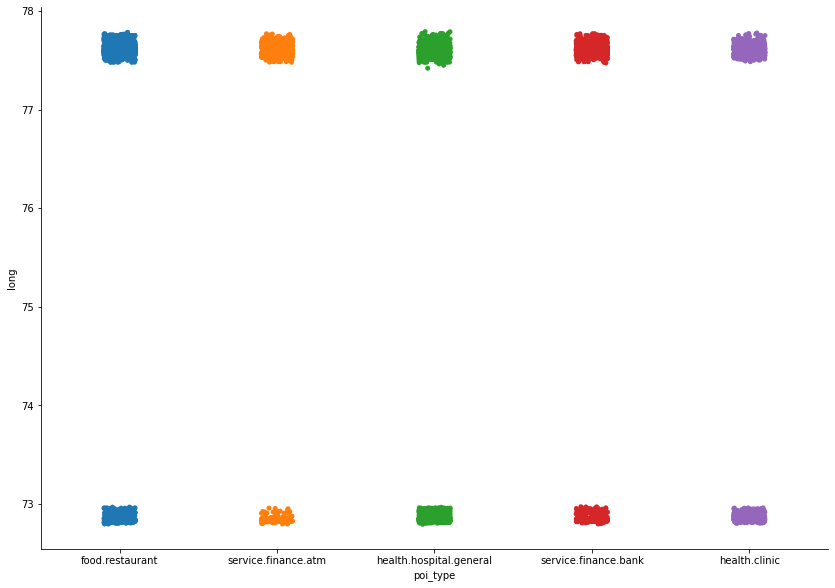

In [14]:
df1=df['poi_type'].value_counts()[:5]
df2=df[df['poi_type'].isin(df1.index.tolist())]
sns.catplot(data=df2, x="poi_type", y="long",height=8.27, aspect=11.7/8.27)

### This graph represent that top 5 poi_type food.restuarent,service.finance.atm,health.hospital,service.finance,health.clinic are available only 2 longitude points 73 and 78

## Top 5 brand based on longitutewise

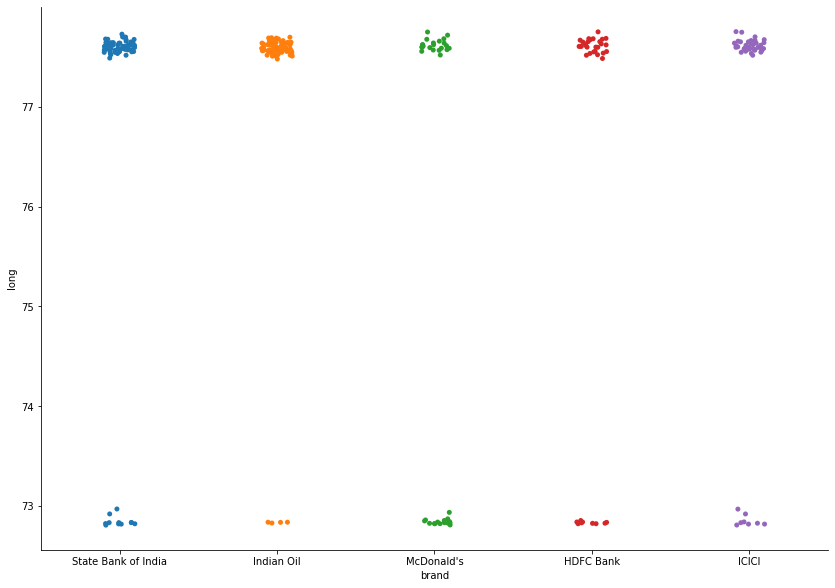

In [15]:
df1=df['brand'].value_counts()[:5]
df2=df[df['brand'].isin(df1.index.tolist())]
sns.catplot(data=df2, x="brand", y="long",height=8.27, aspect=11.7/8.27)

### This graph represents the top 5 brands: State bank of india,indian oil, McDonalds,HDFC bank, ICICI are present on only 2 latitudes 73 and 78

## This graph represents which top 5 brands represents which 5 top poi_type

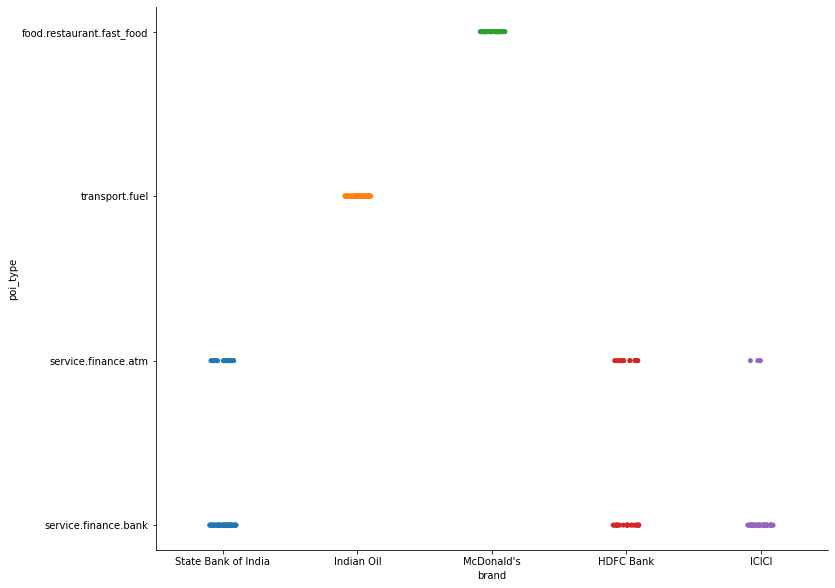

In [16]:
df1=df['brand'].value_counts()[:5]
df2=df[df['brand'].isin(df1.index.tolist())]
sns.catplot(data=df2, x="brand", y="poi_type",height=8.27, aspect=11.7/8.27)

### This graph shows which brands represent what poi_type from the dataset

## Count of top 5 brands in accordance with city- Mumbai and bangalore respectively

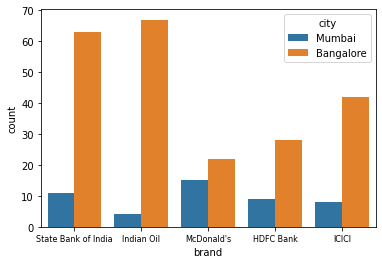

In [22]:
df1=df['brand'].value_counts()[:5]
df2=df[df['brand'].isin(df1.index.tolist())]
#to increase y ticks size
plt.yticks(size=10)
#to increase x ticks 
plt.xticks(size=8)
sns.countplot(x = 'brand',
            hue = 'city',
            data = df2,hue_order=['Mumbai','Bangalore'])

### The distribution of top 5 brands are shown in accordance with the 2 cities: We can easily conclude that more brands are present in Banglore as compared to Mumbai

## Count of top 5 poi_type in accordance of 2 cities Mumbai and Bangalore respectively

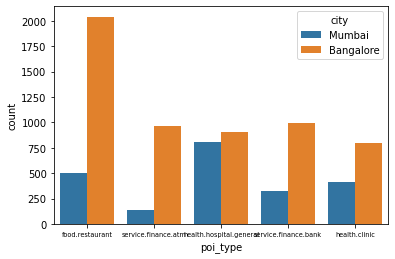

In [28]:
df1=df['poi_type'].value_counts()[:5]
df2=df[df['poi_type'].isin(df1.index.tolist())]
#to increase y ticks size
plt.yticks(size=10)
#to increase x ticks 
plt.xticks(size=6.5)
sns.countplot(x = 'poi_type',
            hue = 'city',
            data = df2,hue_order=['Mumbai','Bangalore'])

### The distribution of top 5 poi_type are shown in accordance with the 2 cities: We can easily conclude that more brands are present in Banglore as compared to Mumbai

## Finding features having missing values

In [29]:
features_with_missing_values=[feature for feature in df.columns if df[feature].isnull().sum()>0]
features_with_missing_values

['name', 'poi_type', 'address', 'pin_code', 'brand']

### Features having missing values are
1. name
2. poi_type
3. address
4. pin_code
5. brand

## Splitting features into categorical and numerical features

In [30]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_feature

['source',
 'poi_code',
 'name',
 'poi_type',
 'address',
 'city',
 'state',
 'country',
 'pin_code',
 'brand']

In [31]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
numerical_feature

['lat', 'long']

## Adding H3 index column using latitute and longitute column

In [34]:
df['H3_index'] = df.apply(lambda x:h3.geo_to_h3(
    lat=x.lat,
    lng=x.long,
    resolution=7) 
    ,axis=1)
df

,source,poi_code,name,poi_type,lat,long,address,city,state,country,pin_code,brand,H3_index
0,OSM,POI_1003_6612393918,Parle,shop.food.bakery,13.049754,77.492895,NaN,Bangalore,Karnataka,India,NaN,NaN,876014598ffffff
1,OSM,POI_1003_6613030600,The Black Pearl,food.restaurant,12.939213,77.694701,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff
2,OSM,POI_1003_4668296373,Temple,NaN,12.940448,77.693816,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff
3,OSM,POI_1003_3771995983,Kadubeesanahalli Underpass,NaN,12.939450,77.695305,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff
4,OSM,POI_1003_2413350412,NaN,health.wellbeing.swimming_pool,12.940660,77.693607,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42925,OSM,POI_1003_3740962178,NaN,NaN,12.976237,77.611640,NaN,Bangalore,Karnataka,India,NaN,NaN,8761892e9ffffff
42926,OSM,POI_1003_3740962179,NaN,NaN,12.976275,77.611514,NaN,Bangalore,Karnataka,India,NaN,NaN,8761892e9ffffff
42927,OSM,POI_1003_3740962181,NaN,NaN,12.976317,77.611396,NaN,Bangalore,Karnataka,India,NaN,NaN,8761892e9ffffff
42928,OSM,POI_1003_3742106925,Soudhamani Estate NSB,NaN,12.821388,77.511637,NaN,Bangalore,Karnataka,India,560082,NaN,876014531ffffff


## Using h3 index column adding parent column

In [35]:
df['H3_parent'] = df.apply(lambda x:h3.h3_to_parent(x.H3_index),axis=1)
df

,source,poi_code,name,poi_type,lat,long,address,city,state,country,pin_code,brand,H3_index,H3_parent
0,OSM,POI_1003_6612393918,Parle,shop.food.bakery,13.049754,77.492895,NaN,Bangalore,Karnataka,India,NaN,NaN,876014598ffffff,86601459fffffff
1,OSM,POI_1003_6613030600,The Black Pearl,food.restaurant,12.939213,77.694701,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff
2,OSM,POI_1003_4668296373,Temple,NaN,12.940448,77.693816,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff
3,OSM,POI_1003_3771995983,Kadubeesanahalli Underpass,NaN,12.939450,77.695305,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff
4,OSM,POI_1003_2413350412,NaN,health.wellbeing.swimming_pool,12.940660,77.693607,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42925,OSM,POI_1003_3740962178,NaN,NaN,12.976237,77.611640,NaN,Bangalore,Karnataka,India,NaN,NaN,8761892e9ffffff,8661892efffffff
42926,OSM,POI_1003_3740962179,NaN,NaN,12.976275,77.611514,NaN,Bangalore,Karnataka,India,NaN,NaN,8761892e9ffffff,8661892efffffff
42927,OSM,POI_1003_3740962181,NaN,NaN,12.976317,77.611396,NaN,Bangalore,Karnataka,India,NaN,NaN,8761892e9ffffff,8661892efffffff
42928,OSM,POI_1003_3742106925,Soudhamani Estate NSB,NaN,12.821388,77.511637,NaN,Bangalore,Karnataka,India,560082,NaN,876014531ffffff,866014537ffffff


## Top 15 occuring h3_indexes in the dataset

In [43]:
df.H3_index.value_counts()[:15]

8761892ecffffff    1798
8761892edffffff    1486
8761892ebffffff    1178
87608b015ffffff     980
876189253ffffff     955
87618925affffff     878
8760145b3ffffff     795
87608b550ffffff     682
87618925bffffff     661
87618925cffffff     655
8760145b4ffffff     654
8761892e9ffffff     627
87608b543ffffff     619
8761892ceffffff     609
87608b016ffffff     605
Name: H3_index, dtype: int64

## Adding column block number to the dataset so records having same h3_indexes thus in the same localities

In [44]:
df['block_no'] = df.groupby(['H3_index']).ngroup()
df

,source,poi_code,name,poi_type,lat,long,address,city,state,country,pin_code,brand,H3_index,H3_parent,block_no
0,OSM,POI_1003_6612393918,Parle,shop.food.bakery,13.049754,77.492895,NaN,Bangalore,Karnataka,India,NaN,NaN,876014598ffffff,86601459fffffff,99
1,OSM,POI_1003_6613030600,The Black Pearl,food.restaurant,12.939213,77.694701,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff,348
2,OSM,POI_1003_4668296373,Temple,NaN,12.940448,77.693816,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff,348
3,OSM,POI_1003_3771995983,Kadubeesanahalli Underpass,NaN,12.939450,77.695305,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff,348
4,OSM,POI_1003_2413350412,NaN,health.wellbeing.swimming_pool,12.940660,77.693607,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff,348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42925,OSM,POI_1003_3740962178,NaN,NaN,12.976237,77.611640,NaN,Bangalore,Karnataka,India,NaN,NaN,8761892e9ffffff,8661892efffffff,464
42926,OSM,POI_1003_3740962179,NaN,NaN,12.976275,77.611514,NaN,Bangalore,Karnataka,India,NaN,NaN,8761892e9ffffff,8661892efffffff,464
42927,OSM,POI_1003_3740962181,NaN,NaN,12.976317,77.611396,NaN,Bangalore,Karnataka,India,NaN,NaN,8761892e9ffffff,8661892efffffff,464
42928,OSM,POI_1003_3742106925,Soudhamani Estate NSB,NaN,12.821388,77.511637,NaN,Bangalore,Karnataka,India,560082,NaN,876014531ffffff,866014537ffffff,72


## Handling Missing Values: From EDA it is evident that categorical features only have missing values so we will handle it using by adding new category "Missing"

In [45]:
#function to handle missing values after passing certain dataframe and feature name
def impute_nan(df,variable):
    """
                                Method Name: impute_nan
                                Description: handles missing values after we provide a dataframe and feature column
                                Outcome: we get a feature values without any missing values
                            

                                Written By: Saurabh Naik
                                Version: 1.0
                                Revisions: None
        """
    df["new_"+variable]=np.where(df[variable].isnull(),"Missing",df[variable])

In [46]:
features_with_missing_values=[feature for feature in df.columns if df[feature].isnull().sum()>0]
for feature in features_with_missing_values:
    impute_nan(df,feature)
df.head()

,source,poi_code,name,poi_type,lat,long,address,city,state,country,pin_code,brand,H3_index,H3_parent,block_no,new_name,new_poi_type,new_address,new_pin_code,new_brand
0,OSM,POI_1003_6612393918,Parle,shop.food.bakery,13.049754,77.492895,NaN,Bangalore,Karnataka,India,NaN,NaN,876014598ffffff,86601459fffffff,99,Parle,shop.food.bakery,Missing,Missing,Missing
1,OSM,POI_1003_6613030600,The Black Pearl,food.restaurant,12.939213,77.694701,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff,348,The Black Pearl,food.restaurant,Missing,Missing,Missing
2,OSM,POI_1003_4668296373,Temple,NaN,12.940448,77.693816,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff,348,Temple,Missing,Missing,Missing,Missing
3,OSM,POI_1003_3771995983,Kadubeesanahalli Underpass,NaN,12.939450,77.695305,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff,348,Kadubeesanahalli Underpass,Missing,Missing,Missing,Missing
4,OSM,POI_1003_2413350412,NaN,health.wellbeing.swimming_pool,12.940660,77.693607,NaN,Bangalore,Karnataka,India,NaN,NaN,876189209ffffff,86618920fffffff,348,Missing,health.wellbeing.swimming_pool,Missing,Missing,Missing


## Droping old features having missing values

In [47]:
df.drop(features_with_missing_values,axis=1,inplace=True)

## Checking if missing values are present in the dataframe after handling that

In [48]:
len([feature for feature in df.columns if df[feature].isnull().sum()>0])

0

In [49]:
df

,source,poi_code,lat,long,city,state,country,H3_index,H3_parent,block_no,new_name,new_poi_type,new_address,new_pin_code,new_brand
0,OSM,POI_1003_6612393918,13.049754,77.492895,Bangalore,Karnataka,India,876014598ffffff,86601459fffffff,99,Parle,shop.food.bakery,Missing,Missing,Missing
1,OSM,POI_1003_6613030600,12.939213,77.694701,Bangalore,Karnataka,India,876189209ffffff,86618920fffffff,348,The Black Pearl,food.restaurant,Missing,Missing,Missing
2,OSM,POI_1003_4668296373,12.940448,77.693816,Bangalore,Karnataka,India,876189209ffffff,86618920fffffff,348,Temple,Missing,Missing,Missing,Missing
3,OSM,POI_1003_3771995983,12.939450,77.695305,Bangalore,Karnataka,India,876189209ffffff,86618920fffffff,348,Kadubeesanahalli Underpass,Missing,Missing,Missing,Missing
4,OSM,POI_1003_2413350412,12.940660,77.693607,Bangalore,Karnataka,India,876189209ffffff,86618920fffffff,348,Missing,health.wellbeing.swimming_pool,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42925,OSM,POI_1003_3740962178,12.976237,77.611640,Bangalore,Karnataka,India,8761892e9ffffff,8661892efffffff,464,Missing,Missing,Missing,Missing,Missing
42926,OSM,POI_1003_3740962179,12.976275,77.611514,Bangalore,Karnataka,India,8761892e9ffffff,8661892efffffff,464,Missing,Missing,Missing,Missing,Missing
42927,OSM,POI_1003_3740962181,12.976317,77.611396,Bangalore,Karnataka,India,8761892e9ffffff,8661892efffffff,464,Missing,Missing,Missing,Missing,Missing
42928,OSM,POI_1003_3742106925,12.821388,77.511637,Bangalore,Karnataka,India,876014531ffffff,866014537ffffff,72,Soudhamani Estate NSB,Missing,Missing,560082,Missing


## Finding no of unique categories in each feature

In [50]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
for col in categorical_feature:
    print(col, ': ', len(df[col].unique()), ' labels')

source :  1  labels
poi_code :  42930  labels
city :  2  labels
state :  2  labels
country :  1  labels
H3_index :  515  labels
H3_parent :  103  labels
new_name :  23462  labels
new_poi_type :  149  labels
new_address :  2425  labels
new_pin_code :  314  labels
new_brand :  227  labels


## Converting categorical feature into numerical features

In [51]:
# let's find a key value pair for a category and its frequecy
# Then assign this key value pair to a map varible
# Then replacing the category with its frequency
for col in categorical_feature:
    df_frequency_map = df[col].value_counts().to_dict()
    df[col] = df[col].map(df_frequency_map)
df.head()

,source,poi_code,lat,long,city,state,country,H3_index,H3_parent,block_no,new_name,new_poi_type,new_address,new_pin_code,new_brand
0,42930,1,13.049754,77.492895,30417,30417,42930,11,117,99,1,465,40267,34977,41849
1,42930,1,12.939213,77.694701,30417,30417,42930,132,979,348,1,2544,40267,34977,41849
2,42930,1,12.940448,77.693816,30417,30417,42930,132,979,348,46,20529,40267,34977,41849
3,42930,1,12.939450,77.695305,30417,30417,42930,132,979,348,1,20529,40267,34977,41849
4,42930,1,12.940660,77.693607,30417,30417,42930,132,979,348,12944,37,40267,34977,41849


## Creating a varience Threshold object 

In [52]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

## Finding columns having 0 varience

In [53]:
constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]
for column in constant_columns:
    print(column)

source
poi_code
country


## Dropping constant columns to reduce unnecessary dimensionality

In [54]:
df.drop(constant_columns,axis=1,inplace=True)
df.shape

(42930, 12)

## Using some domain knowledge we can conclude that some of the features may not be needed in order to do clustering because features like latitute,longitute,new_address,new_pincode can be derieved from block no feature which we have derieved earlier using h3 library. Apart from that name does not contribute towards clustering so we can drop it and as we only have 2 cities included we may drop state in order reduce complexity

In [56]:
columns_to_drop =['lat','long','new_name','new_address','new_pin_code','state']

In [57]:
df.drop(columns_to_drop,axis=1,inplace=True)
df.shape

(42930, 6)

In [214]:
df.head()

,city,H3_index,H3_parent,block_no,new_poi_type,new_brand
0,30417,11,117,99,465,41849
1,30417,132,979,348,2544,41849
2,30417,132,979,348,20529,41849
3,30417,132,979,348,20529,41849
4,30417,132,979,348,37,41849


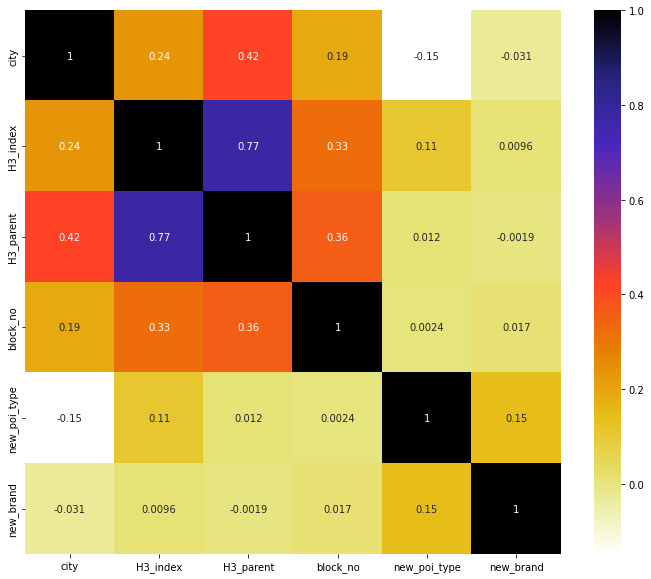

In [215]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### From this correlation matrix we can only deduce that h3_parent is highly correlated with h3_index and other features are not much correlated with each other

## In DBSCAN there are two major hyperparameters:

### 1.eps
### 2.min_samples
### It is difficult arbitrarily to say what values will work the best. Therefore, I will first create a matrix of investigated combinations.

## Because DBSCAN creates clusters itself based on those two parameters let's check the number of generated clusters.

In [67]:
clustering = DBSCAN(eps=800, min_samples=800).fit(df)
DBSCAN_dataset = df.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

In [68]:
DBSCAN_dataset.Cluster.unique()

array([ 0,  9,  1, -1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [70]:
DBSCAN_clust_sizes = DBSCAN_dataset.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,2896
0,8014
1,6821
2,2010
3,5401
4,4185
5,2002
6,3616
7,2659


### From this table we can conclude that there are 9 clusters formed and -1 cluster represents outliers so 2896 data points represents outliers and distribution of other points in other clusters are given above

In [79]:
DBSCAN_dataset

,city,H3_index,H3_parent,block_no,new_poi_type,new_brand,Cluster
0,30417,11,117,99,465,41849,0
1,30417,132,979,348,2544,41849,9
2,30417,132,979,348,20529,41849,1
3,30417,132,979,348,20529,41849,1
4,30417,132,979,348,37,41849,0
...,...,...,...,...,...,...,...
42925,30417,627,6061,464,20529,41849,6
42926,30417,627,6061,464,20529,41849,6
42927,30417,627,6061,464,20529,41849,6
42928,30417,5,18,72,20529,41849,1


## Creating a new Dataframe for each cluster so as to use it for visualization
## Cluster -1 is ignored because it contains outlier points

In [114]:
db = DBSCAN_dataset.groupby('Cluster')
cluster0=db.get_group(0)
cluster1=db.get_group(1)
cluster2=db.get_group(2)
cluster3=db.get_group(3)
cluster4=db.get_group(4)
cluster5=db.get_group(5)
cluster6=db.get_group(6)
cluster7=db.get_group(7)
cluster8=db.get_group(8)
cluster9=db.get_group(9)

## Cluster 0

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


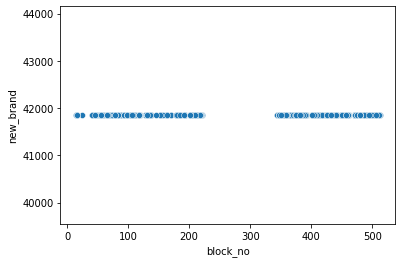

In [164]:
sns.scatterplot(cluster0['block_no'],cluster0['new_brand'])

### From this plot we can conclude that block/locality of this cluster0 only contains one type of brand which is represented by 42000 in numerical format

## Cluster 1

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


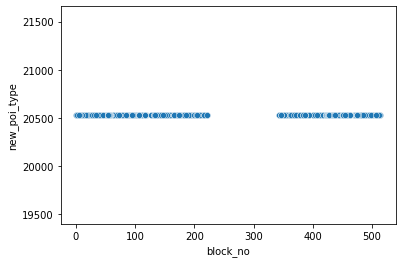

In [165]:
sns.scatterplot(cluster1['block_no'],cluster1['new_poi_type'])

### From this plot we can conclude that block/locality of this cluster only contains one type of poi_type which is represented by 20500 in numerical format

## Cluster 2

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


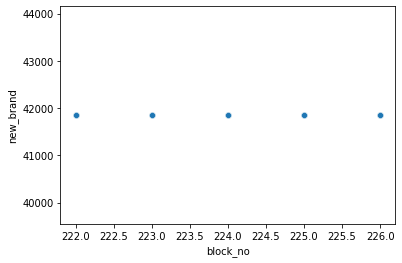

In [176]:
sns.scatterplot(cluster2['block_no'],cluster2['new_brand'])

### From this plot we can conclude that block/locality of this cluster are ranging from 222 to 226 so it is a small region and it only contains one type of brand which is represented by 42000 in numerical format

## Cluster 3

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


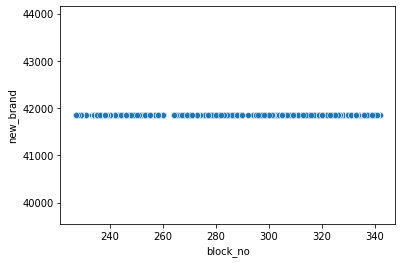

In [178]:
sns.scatterplot(cluster3['block_no'],cluster3['new_brand'])

### From this plot we can conclude that block/locality of this cluster only contains one type of brand which is represented by 42000 in numerical format

## Cluster 4

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


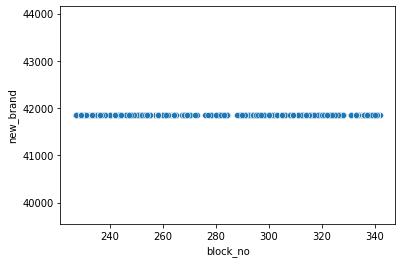

In [186]:
sns.scatterplot(cluster4['block_no'],cluster4['new_brand'])

### From this plot we can conclude that block/locality of this cluster only contains one type of brand which is represented by 42000 in numerical format

## Cluster 5

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


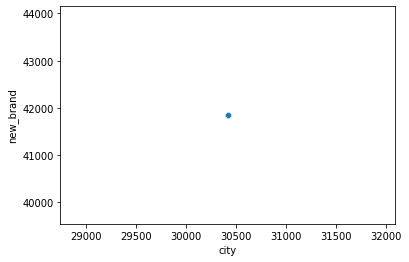

In [191]:
sns.scatterplot(cluster5['city'],cluster5['new_brand'])

### From this plot we can conclude that block/locality of this cluster only contains one type of brand which is represented by 42000 in numerical format and this cluster belong to only 1 city represented by 30500

## Cluster 6

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


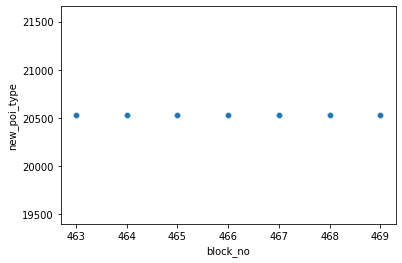

In [195]:
sns.scatterplot(cluster6['block_no'],cluster6['new_poi_type'])

### From this plot we can conclude that block/locality of this cluster which is of small size ranging from 463 to 469 only contains one type of poi_type which is represented by 20500 in numerical format

## Cluster 7

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


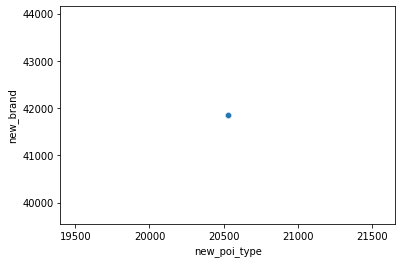

In [200]:
sns.scatterplot(cluster7['new_poi_type'],cluster7['new_brand'])

### From this plot we can conclude that this cluster has only 1 poi_type which is represented by 20500 and 1 type of brand represented by 42000

## Cluster 8

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


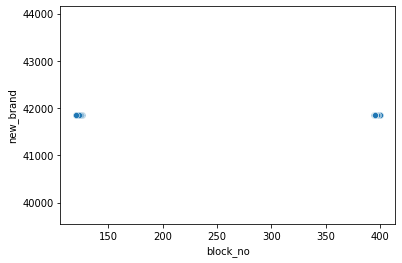

In [213]:
sns.scatterplot(cluster8['block_no'],cluster8['new_brand'])

### From this plot we can conclude that block/locality of this cluster does not contains any brand from range 150 to almost 400. 

## Cluster 9

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


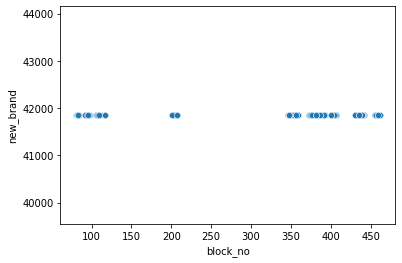

In [212]:
sns.scatterplot(cluster9['block_no'],cluster9['new_brand'])

### From this plot we can conclude that block/locality of this cluster does not contains any brand from range 150 to around 200 and 210 to 350. And locality that do contain brand has only 1 type of brand represented by 42000 